# Pré Processamento dos dados para o Subsistema S (Teste)

O objetivo deste código é gerar um .csv com todos os dados de teste

## Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação e visualização dos dados

### Importação

In [4]:
dados = pd.read_csv('../Dados/S_2026-01-18_CARGAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados.index = pd.to_datetime(dados.index, format="%Y-%m-%dT%H:%M:%SZ")
dados

,Carga
DataHora,
2018-01-01 01:00:00,8946.2425
2018-01-01 02:00:00,9082.4950
2018-01-01 03:00:00,8852.0520
2018-01-01 04:00:00,8530.2230
2018-01-01 05:00:00,8284.3130
...,...
2026-01-17 20:00:00,16676.9805
2026-01-17 21:00:00,17120.2650
2026-01-17 22:00:00,16652.5990


In [5]:
dados_temperatura = pd.read_csv('../Dados/S_2026-01-18_EXOGENAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados_temperatura.index = pd.to_datetime(dados_temperatura.index, format="%Y-%m-%dT%H:%M:%SZ")
dados_temperatura

,Exo_Temperatura
DataHora,
2018-01-01 00:00:00,21.555000
2018-01-01 01:00:00,21.072001
2018-01-01 02:00:00,21.072001
2018-01-01 03:00:00,21.072001
2018-01-01 04:00:00,20.878000
...,...
2026-01-17 19:00:00,24.460001
2026-01-17 20:00:00,23.749000
2026-01-17 21:00:00,23.749000


In [6]:
dias_feriados = pd.read_csv('../Dados/S_2026-01-18_FERIADOS.csv', sep=';', index_col='Data')
dias_feriados.index = pd.to_datetime(dias_feriados.index, format="%Y-%m-%d")
dias_feriados

,Tipo
Data,
2018-01-01,6
2018-01-02,7
2018-02-12,3
2018-02-13,4
2018-02-14,5
...,...
2025-12-25,6
2025-12-26,7
2025-12-31,8


### Retirando valores fora do teste

In [7]:
dados = dados[dados.index >= '2024-12-29 00:00:00']
dados = dados[dados.index.year < 2026]
dados

,Carga
DataHora,
2024-12-29 00:00:00,12865.8035
2024-12-29 01:00:00,12057.7365
2024-12-29 02:00:00,11357.3745
2024-12-29 03:00:00,10875.3670
2024-12-29 04:00:00,10549.7590
...,...
2025-12-31 19:00:00,14312.0000
2025-12-31 20:00:00,14624.4030
2025-12-31 21:00:00,14219.7730


In [8]:
dados_temperatura = dados_temperatura[dados_temperatura.index >= '2024-12-29 00:00:00']
dados_temperatura = dados_temperatura[dados_temperatura.index.year < 2026]
dados_temperatura

,Exo_Temperatura
DataHora,
2024-12-29 00:00:00,20.491600
2024-12-29 01:00:00,19.878000
2024-12-29 02:00:00,19.926300
2024-12-29 03:00:00,19.299200
2024-12-29 04:00:00,19.202600
...,...
2025-12-31 19:00:00,26.487000
2025-12-31 20:00:00,25.293000
2025-12-31 21:00:00,25.293000


In [9]:
dias_feriados = dias_feriados[dias_feriados.index >= '2024-12-29 00:00:00']
dias_feriados = dias_feriados[dias_feriados.index.year < 2026]
dias_feriados

,Tipo
Data,
2024-12-29,12
2024-12-30,12
2024-12-31,8
2025-01-01,6
2025-01-02,7
2025-01-03,12
2025-01-04,12
2025-01-05,12
2025-01-06,12


### Vizualização

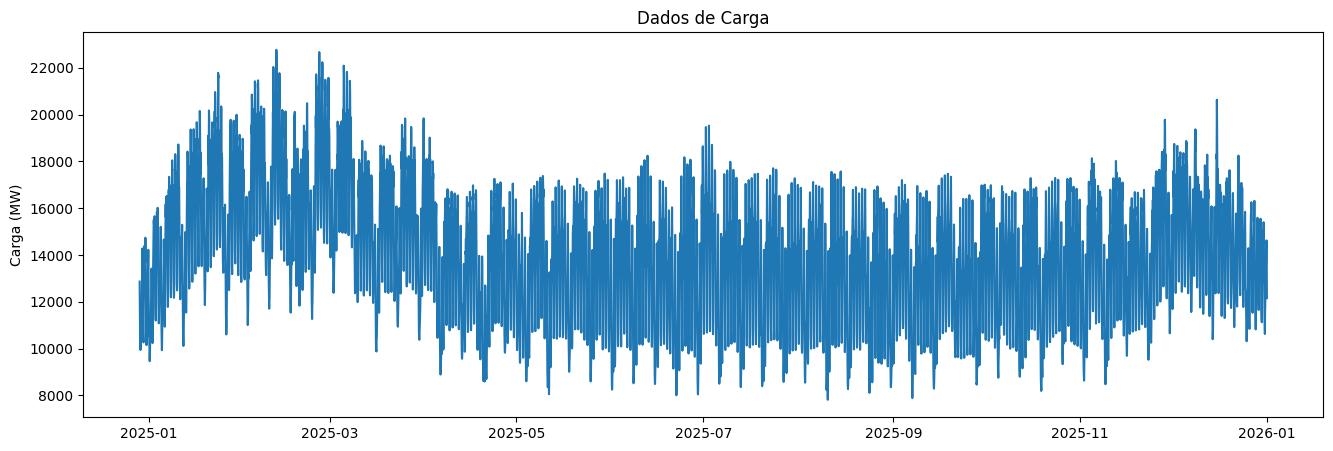

In [10]:
plt.figure(figsize=(16, 5))
plt.plot(dados.index, dados['Carga'], linestyle='-')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

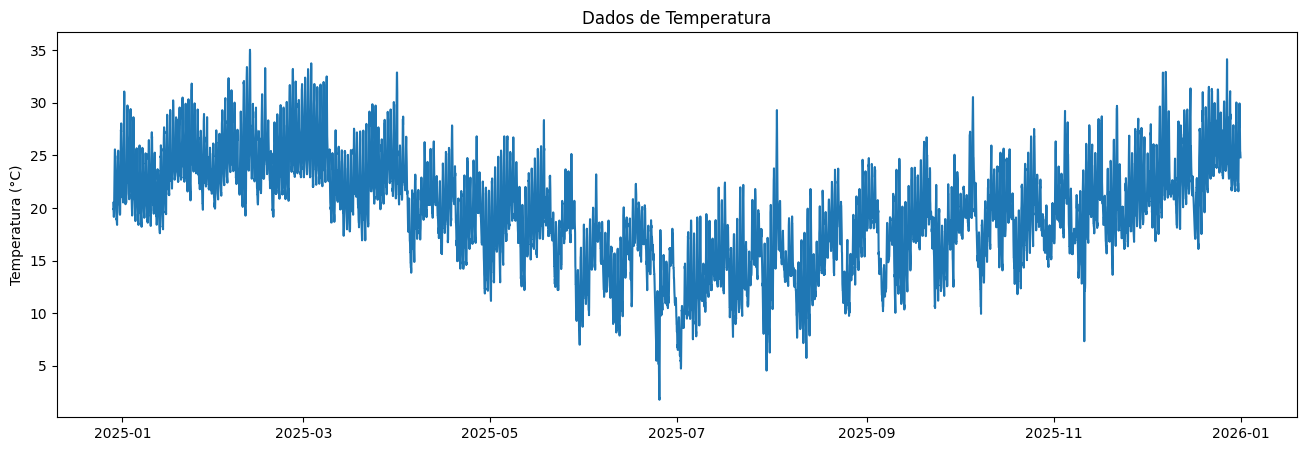

In [11]:
plt.figure(figsize=(16, 5))
plt.plot(dados_temperatura.index, dados_temperatura['Exo_Temperatura'], linestyle='-')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

## Adicionando dados importantes para o treinamento no dataframe

In [12]:
# No dia 16/12/2025 faltou algumas horas de dados para temperatura, esses dados foram substituidos pelos valores de temperatura do dia anterior

faltantes = dados.index.difference(dados_temperatura.index)
print(faltantes)

DatetimeIndex(['2025-12-16 09:00:00', '2025-12-16 10:00:00',
               '2025-12-16 11:00:00', '2025-12-16 12:00:00',
               '2025-12-16 13:00:00', '2025-12-16 14:00:00',
               '2025-12-16 15:00:00', '2025-12-16 16:00:00',
               '2025-12-16 17:00:00', '2025-12-16 18:00:00',
               '2025-12-16 19:00:00', '2025-12-16 20:00:00',
               '2025-12-16 21:00:00', '2025-12-16 22:00:00',
               '2025-12-16 23:00:00'],
              dtype='datetime64[ns]', name='DataHora', freq=None)


In [13]:
dados_temperatura = dados_temperatura.reindex(dados.index)

In [14]:
faltantes = dados.index.difference(dados_temperatura.index)
print(faltantes)

DatetimeIndex([], dtype='datetime64[ns]', name='DataHora', freq=None)


In [15]:
dados_temperatura.isna().sum()

Exo_Temperatura    15
dtype: int64

In [16]:
mask_nan = dados_temperatura.isna()

dados_temperatura[mask_nan] = (
    dados_temperatura.shift(24)[mask_nan]
)

In [17]:
dados_temperatura.isna().sum()

Exo_Temperatura    0
dtype: int64

In [18]:
dados_com_adicao = dados.copy()
dados_com_adicao

,Carga
DataHora,
2024-12-29 00:00:00,12865.8035
2024-12-29 01:00:00,12057.7365
2024-12-29 02:00:00,11357.3745
2024-12-29 03:00:00,10875.3670
2024-12-29 04:00:00,10549.7590
...,...
2025-12-31 19:00:00,14312.0000
2025-12-31 20:00:00,14624.4030
2025-12-31 21:00:00,14219.7730


In [19]:
dados_com_adicao['Temperatura'] = dados_temperatura['Exo_Temperatura']
dados_com_adicao

,Carga,Temperatura
DataHora,,
2024-12-29 00:00:00,12865.8035,20.491600
2024-12-29 01:00:00,12057.7365,19.878000
2024-12-29 02:00:00,11357.3745,19.926300
2024-12-29 03:00:00,10875.3670,19.299200
2024-12-29 04:00:00,10549.7590,19.202600
...,...,...
2025-12-31 19:00:00,14312.0000,26.487000
2025-12-31 20:00:00,14624.4030,25.293000
2025-12-31 21:00:00,14219.7730,25.293000


In [20]:
for col in dados_com_adicao.columns:
    idx_nan = dados_com_adicao.index[dados_com_adicao[col].isna()]
    if len(idx_nan) > 0:
        print(f"\nColuna: {col}")
        print(idx_nan[:10])  # primeiros exemplos


In [21]:
# Adicionando o dia da semana no formato trigonométrico

dados_com_adicao['Dia_da_Semana'] = dados_com_adicao.index.dayofweek
dados_com_adicao['seno_dia_semana'] = np.sin(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))
dados_com_adicao['cosseno_dia_semana'] = np.cos(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))

dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana
DataHora,,,,,
2024-12-29 00:00:00,12865.8035,20.491600,6,-0.781831,0.623490
2024-12-29 01:00:00,12057.7365,19.878000,6,-0.781831,0.623490
2024-12-29 02:00:00,11357.3745,19.926300,6,-0.781831,0.623490
2024-12-29 03:00:00,10875.3670,19.299200,6,-0.781831,0.623490
2024-12-29 04:00:00,10549.7590,19.202600,6,-0.781831,0.623490
...,...,...,...,...,...
2025-12-31 19:00:00,14312.0000,26.487000,2,0.974928,-0.222521
2025-12-31 20:00:00,14624.4030,25.293000,2,0.974928,-0.222521
2025-12-31 21:00:00,14219.7730,25.293000,2,0.974928,-0.222521


In [22]:
# Adicionando o mês do ano no formato trigonométrico

dados_com_adicao['Mes'] = dados_com_adicao.index.month  # Janeiro = 1, ..., Dezembro = 12
dados_com_adicao['seno_mes'] = np.sin(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao['cosseno_mes'] = np.cos(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana,Mes,seno_mes,cosseno_mes
DataHora,,,,,,,,
2024-12-29 00:00:00,12865.8035,20.491600,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 01:00:00,12057.7365,19.878000,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 02:00:00,11357.3745,19.926300,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 03:00:00,10875.3670,19.299200,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 04:00:00,10549.7590,19.202600,6,-0.781831,0.623490,12,-2.449294e-16,1.0
...,...,...,...,...,...,...,...,...
2025-12-31 19:00:00,14312.0000,26.487000,2,0.974928,-0.222521,12,-2.449294e-16,1.0
2025-12-31 20:00:00,14624.4030,25.293000,2,0.974928,-0.222521,12,-2.449294e-16,1.0
2025-12-31 21:00:00,14219.7730,25.293000,2,0.974928,-0.222521,12,-2.449294e-16,1.0


In [23]:
# Limpando os dados das colunas auxiliares

dados_com_adicao.drop(['Dia_da_Semana', 'Mes'], axis='columns', inplace=True)
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,12865.8035,20.491600,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,12057.7365,19.878000,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,11357.3745,19.926300,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,10875.3670,19.299200,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,10549.7590,19.202600,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,14312.0000,26.487000,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,14624.4030,25.293000,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,14219.7730,25.293000,0.974928,-0.222521,-2.449294e-16,1.0


In [24]:
dados_com_adicao.columns

Index(['Carga', 'Temperatura', 'seno_dia_semana', 'cosseno_dia_semana',
       'seno_mes', 'cosseno_mes'],
      dtype='object')

## Normalizando os dados

In [25]:
# Pegando a normalização já existente do treinamento e validação

dados_normalizacao = pd.read_csv("Normalizacao_S.txt", index_col=0)
dados_normalizacao

,Carga,Exo_Temperatura
Min,5605.34445,3.144600
Max,24174.16568,39.708899


In [26]:
carga_maximo = dados_normalizacao[dados_normalizacao.index == 'Max']["Carga"]
carga_minimo = dados_normalizacao[dados_normalizacao.index == 'Min']["Carga"]

print(f'Valor máximo de carga: {carga_maximo}')
print(f'Valor mínimo de carga: {carga_minimo}')

Valor máximo de carga: Max    24174.16568
Name: Carga, dtype: float64
Valor mínimo de carga: Min    5605.34445
Name: Carga, dtype: float64


In [27]:
carga_maxima_para_normalizacao = carga_maximo.iloc[0]
carga_minima_para_normalizacao = carga_minimo.iloc[0]

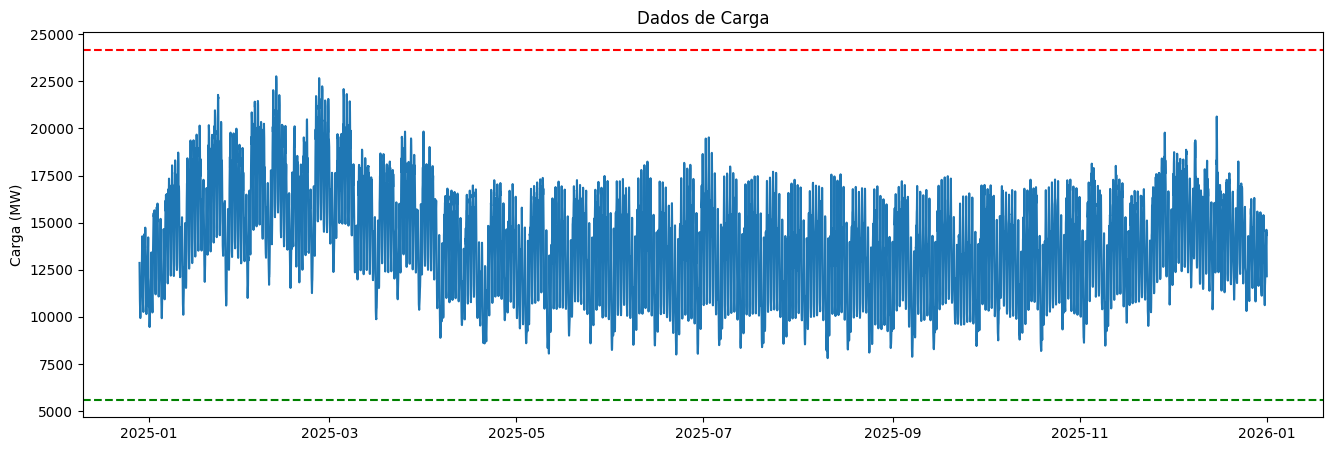

In [28]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Carga'], linestyle='-')
plt.axhline(y=carga_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=carga_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

In [29]:
# Normalizando dados

dados_com_adicao['Carga'] = 2*(dados_com_adicao['Carga'] - carga_minima_para_normalizacao) / (carga_maxima_para_normalizacao - carga_minima_para_normalizacao)-1
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,-0.217995,20.491600,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,-0.305029,19.878000,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,-0.380464,19.926300,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,-0.432379,19.299200,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,-0.467450,19.202600,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,-0.062229,26.487000,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,-0.028580,25.293000,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,-0.072162,25.293000,0.974928,-0.222521,-2.449294e-16,1.0


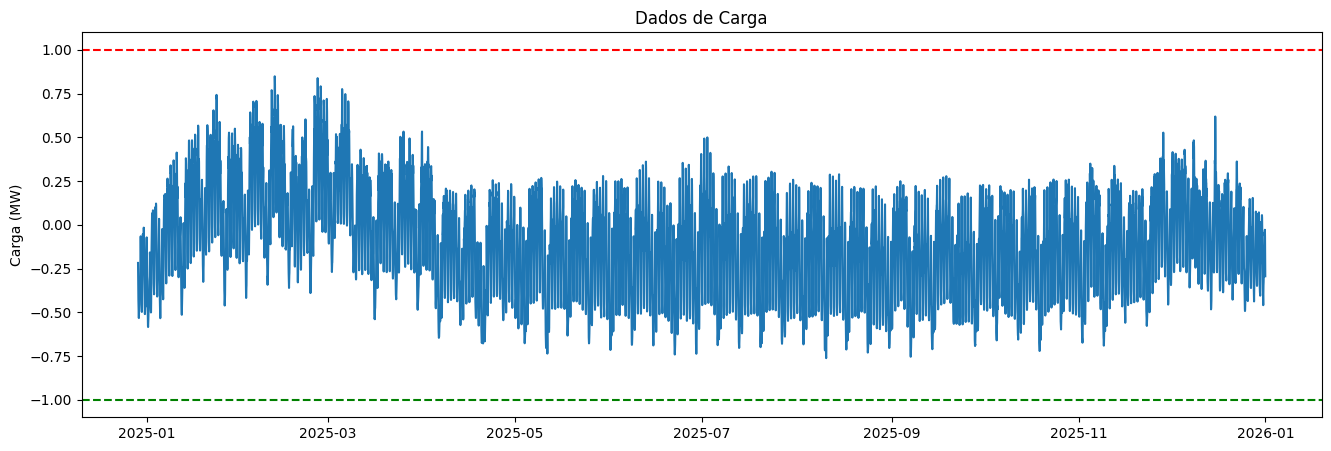

In [30]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Carga'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

### Temperatura

In [31]:
temperatura_maxima = dados_normalizacao[dados_normalizacao.index == 'Max']["Exo_Temperatura"]
temperatura_minimo = dados_normalizacao[dados_normalizacao.index == 'Min']["Exo_Temperatura"]

print(f'Valor máximo de carga: {temperatura_maxima}')
print(f'Valor mínimo de carga: {temperatura_minimo}')

Valor máximo de carga: Max    39.708899
Name: Exo_Temperatura, dtype: float64
Valor mínimo de carga: Min    3.1446
Name: Exo_Temperatura, dtype: float64


In [32]:
temperatura_maxima_para_normalizacao = temperatura_maxima.iloc[0]
temperatura_minima_para_normalizacao = temperatura_minimo.iloc[0]

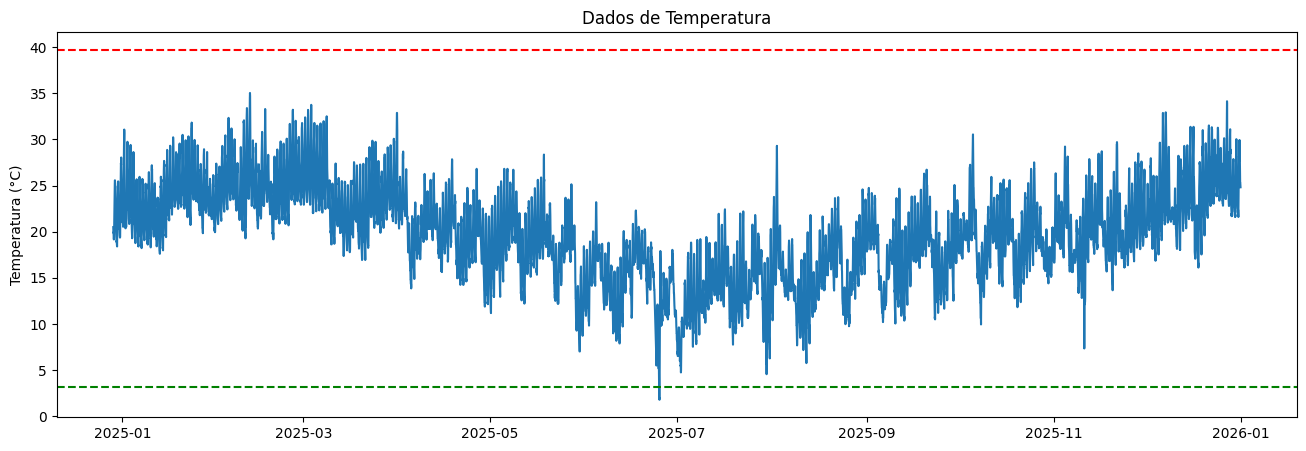

In [33]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Temperatura'], linestyle='-')
plt.axhline(y=temperatura_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=temperatura_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

In [34]:
# Normalizando dados

dados_com_adicao['Temperatura'] = 2*(dados_com_adicao['Temperatura'] - temperatura_minima_para_normalizacao) / (temperatura_maxima_para_normalizacao - temperatura_minima_para_normalizacao)-1
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,-0.217995,-0.051151,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,-0.305029,-0.084714,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,-0.380464,-0.082072,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,-0.432379,-0.116373,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,-0.467450,-0.121657,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,-0.062229,0.276786,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,-0.028580,0.211477,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,-0.072162,0.211477,0.974928,-0.222521,-2.449294e-16,1.0


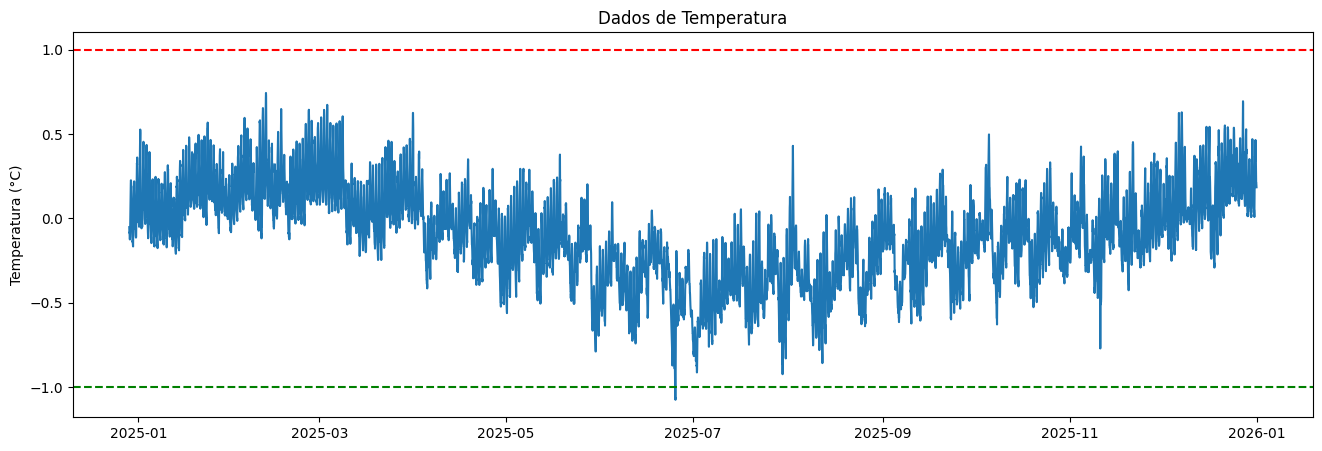

In [35]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Temperatura'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

## Salvando normalizações e pré processamento

In [36]:
# Salvando dados

dados_com_adicao.to_csv('S_teste.csv')